In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import re
from datetime import datetime

data = pd.read_csv('pizza.csv')
data['As Of Date'] = pd.to_datetime(data['As Of Date'])
data['Username'] = data['Username'].map({'papajohnsus':'papajohnsus','papajohns':'papajohns','Dominos':'Dominos','dominos.ch':'dominos.ch','DominosPizza':'DominosPizza','dominosdeutschland':'dominosdeutschland','dominospizzadeutschland':'dominosdeutschland' })

In [18]:
data

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Username,Checkins,Has App,Were Here Count,Likes,Talking About Count,Facebook Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,lon:dom,207571100452,38468604,2018-06-25,DominosPizza,0,False,591946,19780410,4332,207571100452,2018-06-26 01:39:25,2018-06-26 01:39:25,Consumer Services,Travel & Leisure
1,nyse:dpz,6657899956,38466164,2018-06-25,Dominos,0,False,591712,19780675,51198,6657899956,2018-06-25 01:48:13,2018-06-25 01:48:13,Consumer Services,Travel & Leisure
2,nasdaq:pzza,34703237638,38466028,2018-06-25,papajohnsus,17376,False,440551,5962841,11094,34703237638,2018-06-25 01:46:04,2018-06-25 01:46:04,Consumer Services,Travel & Leisure
3,lon:dom,137239632978345,38464695,2018-06-14,dominos.ch,0,False,139,16021,179,137239632978345,2018-06-15 18:54:52,2018-06-15 18:54:52,Consumer Services,Travel & Leisure
4,lon:dom,172657786081466,38464696,2018-06-14,dominosdeutschland,729,False,14,262662,2141,172657786081466,2018-06-15 18:54:52,2018-06-15 18:54:52,Consumer Services,Travel & Leisure
5,nyse:dpz,6657899956,38458154,2018-06-13,Dominos,0,False,584216,19764906,58554,6657899956,2018-06-13 18:55:39,2018-06-13 18:55:39,Consumer Services,Travel & Leisure
6,lon:dom,375119861670,38460436,2018-06-13,NaN,0,False,584485,19766833,54,375119861670,2018-06-13 19:00:17,2018-06-13 19:00:17,Consumer Services,Travel & Leisure
7,lon:dom,207571100452,38460435,2018-06-13,DominosPizza,0,False,584435,19766267,704,207571100452,2018-06-13 19:00:17,2018-06-13 19:00:17,Consumer Services,Travel & Leisure
8,nasdaq:pzza,34703237638,38457518,2018-06-13,papajohnsus,16826,False,438311,5951737,9761,34703237638,2018-06-13 18:54:08,2018-06-13 18:54:08,Consumer Services,Travel & Leisure
9,nasdaq:pzza,34703237638,38449007,2018-06-08,papajohnsus,16636,False,437262,5944250,11919,34703237638,2018-06-08 17:23:33,2018-06-08 17:23:33,Consumer Services,Travel & Leisure


In [19]:
data['Ticker Symbol'].unique()

array(['lon:dom', 'nyse:dpz', 'nasdaq:pzza'], dtype=object)

In [20]:
data['Username'].unique()

array(['DominosPizza', 'Dominos', 'papajohnsus', 'dominos.ch',
       'dominosdeutschland', nan, 'papajohns'], dtype=object)

Tickers and associated Usernames:
* 'nasdaq:pzza' - Papa Johns (papajohnsus,papajohns)
* 'lon:dom' - Domino's Pizza (DominosPizza, dominos.ch, dominosdeutschland, DominosIreland, 'dominospizzadeutschland')
* 'nyse:dpz' - Dominos

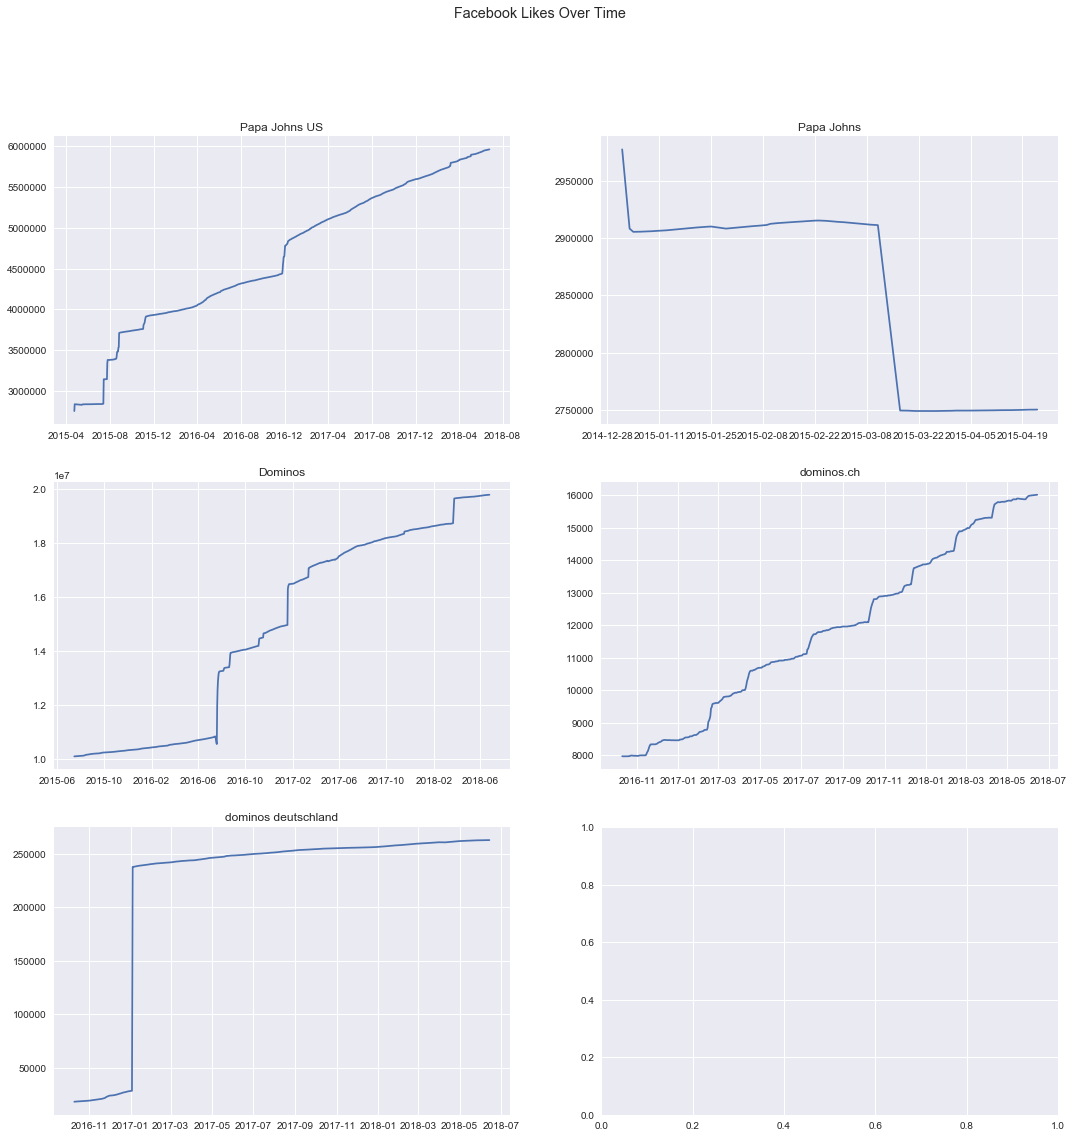

In [25]:
import matplotlib.pyplot as plt
import numpy as np
fig1, f1_axes = plt.subplots(ncols=2, nrows=3,figsize=(18,18))
fig1.suptitle('Facebook Likes Over Time')

plt.subplot(3, 2, 1)
plt.title('Papa Johns US')
df_pj_us = data[data['Username']== 'papajohnsus']
plt.plot(df_pj_us['As Of Date'],df_pj_us['Likes'])

plt.subplot(3, 2, 2)
plt.title('Papa Johns')
df_pj = data[data['Username']=='papajohns']
plt.plot(df_pj['As Of Date'],df_pj['Likes'])

plt.subplot(3, 2, 3)
plt.title('Dominos')
df_dom = data[data['Username']=='Dominos']
plt.plot(df_dom['As Of Date'],df_dom['Likes'])

plt.subplot(3, 2, 4)
plt.title('dominos.ch')
df_dom_ch = data[data['Username']=='dominos.ch']
plt.plot(df_dom_ch['As Of Date'],df_dom_ch['Likes'])

plt.subplot(3, 2, 5)
plt.title('dominos deutschland')
df_loco = data[data['Username']=='dominosdeutschland']
plt.plot(df_loco['As Of Date'],df_loco['Likes'])

plt.show()